# LFV Higgs decays in SeeSaw model ( Thao et al results)

In this model the couplings that allows LFVHD are given by 

| Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|-------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------|
|$h W^{+\mu} W^{-\nu}$|$i g m_{W} g_{\mu \nu}$|$h G_{W}^{+} G_{W}^{-}$|$\frac{-igm_h^2}{2 m_W}$|
|$h G_{W}^{+} {W}^{-\mu}$|$\frac{ig}{2}(p_{+}- p_0)_{\mu}$|$h G_{W}^{-} W^{+\mu}$|$\frac{i g}{2}\left(p_{0}-p_{-}\right)_{\mu}$|
|$\bar{n}_{i} e_{a} W_{\mu}^{+}$|$\frac{i g}{\sqrt{2}} U_{a i}^{\nu} \gamma^{\mu} P_{L}$|$\overline{e_{a}} n_{j} W_{\mu}^{-}$|$\frac{i g}{\sqrt{2}} U_{a j}^{\nu *} \gamma^{\mu} P_{L}$|
|$\bar{n}_{i} e_{a} G_{W}^{+}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a i}^{\nu}\left(m_{e_{a}} P_{R}-m_{n, i} P_{L}\right)$|$\overline{e_{a}} n_{j} G_{W}^{-}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a j}^{\nu *}\left(m_{e_{a}} P_{L}-m_{n, j} P_{R}\right)$|
|$h\overline{n_i}n_j$|$\frac{-i g}{2 m_W}\left[C_{i j}\left(P_{L} m_{n_{i}}+P_{R} m_{n_{j}}\right) \quad+C_{i j}^{*}\left(P_{L} m_{n_{j}}+P_{R} m_{n_{i}}\right)\right]$|$h\overline{e_a}e_a$|$\frac{-ig m_{e_a}}{2 m_W}$|




In [51]:
from sympy import symbols, init_printing, conjugate,I,pi,IndexedBase,sqrt,Add,simplify,factor,conjugate
init_printing()

**Assigning masses of initial and final particles**

In [52]:
import OneLoopLFVHD as lfvhd

**Defining symbolic variables**

In [53]:
g = symbols('g',positive=True)
mW,mG = symbols('m_W,m_G',positive=True)


Uν = IndexedBase(r'{{U^\nu}}')
Uνc = IndexedBase(r'{{U^{\nu *}}}')
mn = IndexedBase(r'{{m_n}}')
#me = IndexedBase(r'{{m_e}}')
C = IndexedBase(r'C')
Cc = IndexedBase(r'{{C^*}}')
a,b,i,j = symbols('a,b,i,j',integer=True)

In [54]:
mh = lfvhd.ma
me = {a:lfvhd.mi,b:lfvhd.mj}
me

**Defining vertexes**

In [55]:
vertexhWW = lfvhd.VertexHVV(I*g*mW)
vertexhGG = lfvhd.VertexHSS((-I*g*mh**2)/(2*mW))

vertexhWG = lfvhd.VertexHVpSm(I*g/2)
vertexhGW = lfvhd.VertexHSpVm(I*g/2)

vertexneWu =lambda i,a: lfvhd.VertexVFF(0,I*g/sqrt(2)*Uν[a,i])
vertexenWd =lambda j,b: lfvhd.VertexVFF(0,I*g/sqrt(2)*Uνc[b,j])

vertexneGu = lambda i,a: lfvhd.VertexSFF((-I*g)/(sqrt(2)*mW)*me[a]*Uν[a,i],
                                         (I*g)/(sqrt(2)*mW)*mn[i]*Uν[a,i])

vertexenGd = lambda j,b: lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mn[j]*Uνc[b,j],
                                         (-I*g)/(sqrt(2)*mW)*me[b]*Uνc[b,j])

vertexhnn = lambda i,j: lfvhd.VertexHF0F0((-I*g)/(2*mW)*(mn[j]*C[i,j] + mn[i]*Cc[i,j]),
                                          (-I*g)/(2*mW)*(mn[i]*C[i,j] + mn[j]*Cc[i,j]))

vertexhee = lambda a:lfvhd.VertexHFF((-I*g*me[a])/(2*mW))

## Form factors of SeeSaw model

We are taking the diagrams of [Lepton flavor violating Higgs boson decays from massive seesaw neutrinos](https://arxiv.org/pdf/hep-ph/0407302.pdf), and we reproduce the form factor of [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://inspirehep.net/files/b569c392f2240d487f9731316b2d5ffc)

### Triangle Gninj
The **left** form factor

$$\begin{aligned} F_{L}^{(1)} &=-\frac{g^{3} m_{a}}{64 \pi^{2} m_{W}^{3}} \sum_{i, j=1}^{K+3} B_{a i} B_{b j}^{*}\left\{C_{i j}\left[m_{n j}^{2}\left(B_{0}^{(12)}+m_{W}^{2} C_{0}\right)\right.\right.\\ &\left.-\left(m_{a}^{2} m_{n j}^{2}+m_{b}^{2} m_{n_{i}}^{2}-2 m_{n_{i}}^{2} m_{n_{j}}^{2}\right) C_{1}\right] \\ &\left.+m_{n_{i}} m_{n_{j}} C_{i j}^{*}\left[B_{0}^{(12)}+m_{W}^{2} C_{0}+\left(m_{n_{i}}^{2}+m_{n_{j}}^{2}-m_{a}^{2}-m_{b}^{2}\right) C_{1}\right]\right\} \end{aligned}$$

In [111]:
A = g**3/(64*pi**2*mW**3)
m = IndexedBase('m')
h,ea,eb = symbols('h,e_a,e_b');
cambios = {lfvhd.ma:m[h],lfvhd.mi:m[a],lfvhd.mj:m[b]}
cambios_cross = {lfvhd.ma:m[h],lfvhd.mi:m[b],lfvhd.mj:m[a]}

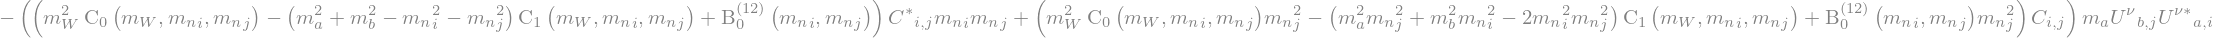

In [126]:
triangleGninj = lfvhd.TriangleSFF(vertexhnn(i,j),vertexneGu(j,b),vertexenGd(i,a),[mW,mn[i],mn[j]])
AL1 = (-triangleGninj.AL()/A).expand().collect([C[i,j],Cc[i,j]],simplify).collect(triangleGninj.Cs
                                                            ).simplify().subs(cambios)
AL1

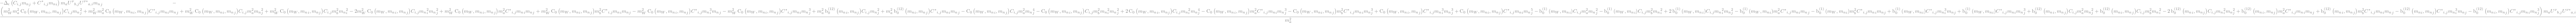

In [127]:
AL1.subs(lfvhd.cambiosDivFin(mW,mn[i],mn[j])).expand().collect([lfvhd.Δe],factor)

This is the diagram 1 of our reference (1) and the **right** form factor is given by

$\begin{aligned} F_{R}^{(1)} &=-\frac{g^{3} m_{b}}{64 \pi^{2} m_{W}^{3}} \sum_{i, j=1}^{K+3} B_{a i} B_{b j}^{*}\left\{C_{i j}\left[m_{n_{i}}^{2}\left(B_{0}^{(12)}+m_{W}^{2} C_{0}\right)\right.\right.\\ &\left.+\left(m_{a}^{2} m_{n_{j}}^{2}+m_{b}^{2} m_{n_{i}}^{2}-2 m_{n_{i}}^{2} m_{n_{j}}^{2}\right) C_{2}\right] \\ &\left.+m_{n_{i}} m_{n_{j}} C_{i j}^{*}\left[B_{0}^{(12)}+m_{W}^{2} C_{0}-\left(m_{n_{i}}^{2}+m_{n_{j}}^{2}-m_{a}^{2}-m_{b}^{2}\right) C_{2}\right]\right\} \end{aligned}$

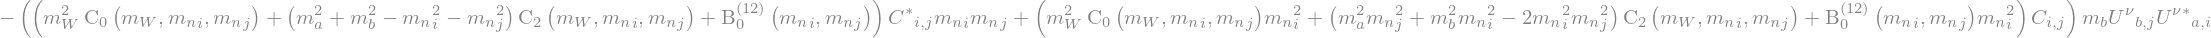

In [128]:
(-triangleGninj.AR()/A).expand().collect([C[i,j],Cc[i,j]],simplify).collect([lfvhd.C2(mW,mn[i],mn[j])]).simplify(
).simplify().subs(cambios)

### Triangle Wninj

This is the diagram 2 of our reference

In [129]:
#vertexhnn = lambda i,j: lfvhd.VertexHF0F0((-I*g)/(2*mW)*(mn[j]*C[i,j] + mn[i]*Cc[i,j]),(-I*g)/(2*mW)*(
#    mn[i]*C[i,j] + mn[j]*Cc[i,j]))
triangleWninj = lfvhd.TriangleVFF(vertexhnn(i,j),vertexenWd(j,b),vertexneWu(i,a),[mW,mn[i],mn[j]])

$\begin{aligned} F_{L}^{(2)} &=\frac{g^{3} m_{a}}{64 \pi^{2} m_{W}^{3}} \sum_{i, j=1}^{K+3} B_{a i} B_{b j}^{*} \times 2 m_{W}^{2} \\ & \times\left\{C_{i j}\left[m_{n_{j}}^{2} C_{0}-\left(m_{n_{i}}^{2}+m_{n_{j}}^{2}\right) C_{1}\right]+m_{n_{i}} m_{n_{j}} C_{i j}^{*}\left(C_{0}-2 C_{1}\right)\right\} \end{aligned}$

In [130]:
AL2 = (-triangleWninj.AL().subs(lfvhd.D,4)/A).expand().collect([C[i,j],Cc[i,j]],simplify).subs(
    cambios).simplify()
AL2

 $\begin{aligned} F_{R}^{(2)} &=\frac{g^{3} m_{b}}{64 \pi^{2} m_{W}^{3}} \sum_{i, j=1}^{K+3} B_{a i} B_{b j}^{*} \times 2 m_{W}^{2} \\ & \times\left\{C_{i j}\left[m_{n_{i}}^{2} C_{0}+\left(m_{n_{i}}^{2}+m_{n_{j}}^{2}\right) C_{2}\right]+m_{n_{i}} m_{n_{j}} C_{i j}^{*}\left(C_{0}+2 C_{2}\right)\right\} \end{aligned}$

In [131]:
(-triangleWninj.AR().subs(lfvhd.D,4)/A).expand().collect([C[i,j],Cc[i,j]],simplify).subs(
    cambios).simplify()

### Triangle niWW

This is the diagram 3 of our reference

In [132]:
triangleniWW = lfvhd.TriangleFVV(vertexhWW,vertexenWd(i,b),vertexneWu(i,a),[mn[i],mW,mW])

In [133]:
AL3 = (-triangleniWW.AL().subs(lfvhd.D,4)/A).subs(cambios)
AL3

In [134]:
(-triangleniWW.AR().subs(lfvhd.D,4)/A).subs(cambios)

### Triangle niWG

This is the diagram 4 of our reference

In [135]:
es = {b:eb,a:ea}
#cambiosba = {lfvhd.ma:m[h],lfvhd.mi:m[b],lfvhd.mj:m[a]}
#vertexenGdRL = lambda j,b: lfvhd.VertexSFF((-I*g)/(sqrt(2)*mW)*me[b]*Uνc[b,j],
#                               (I*g)/(sqrt(2)*mW)*mn[j]*Uνc[b,j])
#vertexenGdRL(i,a).show().simplify().subs(cambios)

In [136]:
triangleniWG = lfvhd.TriangleFVS(vertexhWG,vertexneGu(i,b),vertexenWd(i,a),[mn[i],mW,mW])

In [137]:
AL4 = (-triangleniWG.AL()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)
AL4

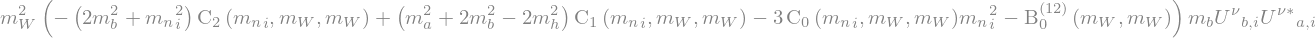

In [138]:
(-triangleniWG.AR()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)

### Triangle niGW

This is the diagram 5 of our reference

In [70]:
#vertexneGuRL = lambda i,a: lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mn[i]*Uν[a,i],
#                                         (-I*g)/(sqrt(2)*mW)*me[a]*Uν[a,i])

In [139]:
triangleniGW = lfvhd.TriangleFSV(vertexhGW,vertexneWu(i,b),vertexenGd(i,a),[mn[i],mW,mW])

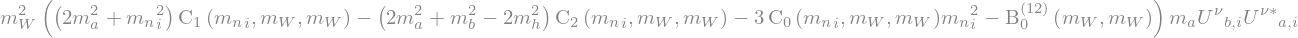

In [140]:
AL5 = (-triangleniGW.AL()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)
AL5

In [141]:
(-triangleniGW.AR()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)

### Triangle niGG

This is the diagram 6 of our reference

In [142]:
triangleniGG = lfvhd.TriangleFSS(vertexhGG,vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW,mW])

In [143]:
AL6 = (-triangleniGG.AL()/A).expand().collect([mn[i]],simplify
                                      ).simplify().subs(cambios)
AL6

In [144]:
(-triangleniGG.AR()/A).expand().collect([mn[i]],simplify
                                  ).simplify().subs(cambios)

### Bubble niW

This is the diagram 7 of our reference

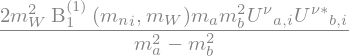

In [145]:
bubbleniW = lfvhd.BubbleFV(vertexhee(b),vertexenWd(i,b),vertexneWu(i,a),[mn[i],mW])
AL7 = (-bubbleniW.AL()/A).subs(lfvhd.D,4).subs(cambios)
AL7

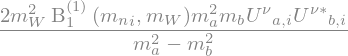

In [146]:
(-bubbleniW.AR()/A).subs(lfvhd.D,4).subs(cambios)

### Bubble Wni

This is the diagram 9 of our reference

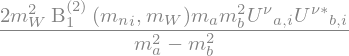

In [147]:
bubbleWni = lfvhd.BubbleVF(vertexhee(a),vertexenWd(i,b),vertexneWu(i,a),[mn[i],mW])
AL9 = (-bubbleWni.AL()/A).subs(lfvhd.D,4).subs(cambios).simplify()
AL9

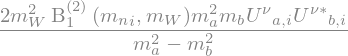

In [148]:
(-bubbleWni.AR()/A).subs(lfvhd.D,4).subs(cambios).simplify()

**Adding bubble niW y Wni**

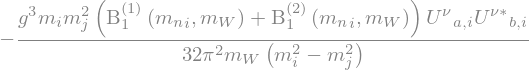

In [149]:
BniW_L =  (bubbleniW.AL() + bubbleWni.AL()).subs(lfvhd.D,4).simplify()
BniW_L

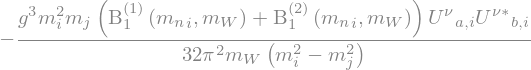

In [150]:
BniW_R =  (bubbleniW.AR() + bubbleWni.AR()).subs(lfvhd.D,4).simplify()
BniW_R

### Bubble niG

This is the diagram 8 of our reference

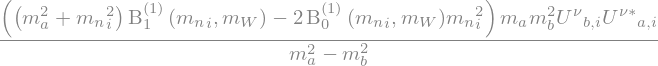

In [151]:
bubbleniG = lfvhd.BubbleFS(vertexhee(b),vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW])
AL8 = (-bubbleniG.AL()/A).collect([
    lfvhd.B1_0(mn[i],mW),lfvhd.B1_1(mn[i],mW)]).simplify().subs(cambios)
AL8

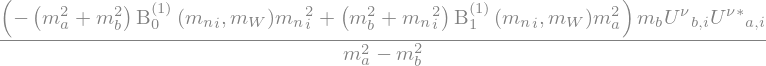

In [152]:
AR8 = (-bubbleniG.AR()/A).collect([
    lfvhd.B1_0(mn[i],mW),lfvhd.B1_1(mn[i],mW)]).simplify().subs(cambios)
AR8

### Bubble Gni

This is the diagram 10 of our reference

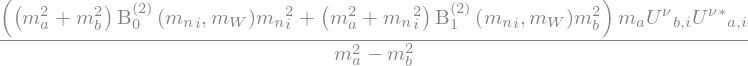

In [153]:
bubbleGni = lfvhd.BubbleSF(vertexhee(a),vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW])
AL10 = (-bubbleGni.AL()/A).collect([
      lfvhd.B2_0(mn[i],mW),lfvhd.B2_1(mn[i],mW)]).simplify().subs(cambios)
AL10

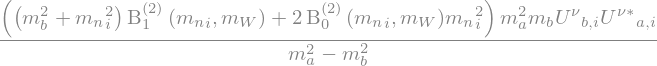

In [154]:
AR10 = (-bubbleGni.AR()/A).collect([
    lfvhd.B2_0(mn[i],mW),lfvhd.B2_1(mn[i],mW)]).simplify().subs(cambios)
AR10

**Adding bubble niG y Gni**

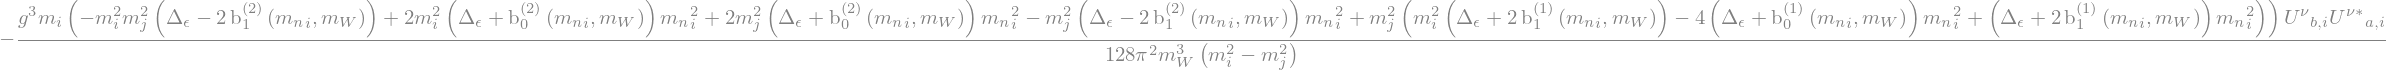

In [155]:
BniG_L =  (bubbleniG.AL() + bubbleGni.AL()).subs(lfvhd.D,4).simplify()
BB1 = BniG_L.subs(mn[j],mn[i]).subs(lfvhd.cambiosDivFin(mn[i],mW,mW)).simplify()
BB1

In [156]:
from sympy import Add

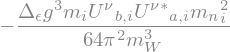

In [157]:
Add(*[x for x in BB1.expand().args if x.has(lfvhd.Δe)]).simplify()

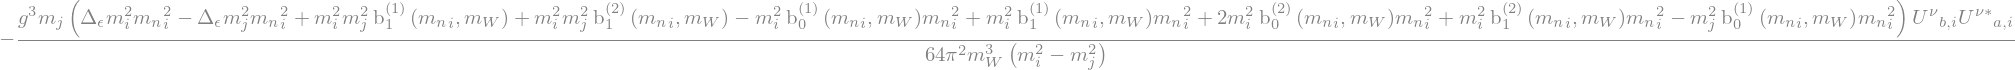

In [158]:
BniG_R =  (bubbleniG.AR() + bubbleGni.AR()).subs(lfvhd.D,4).simplify()
BB2 = BniG_R.subs(mn[j],mn[i]).subs(lfvhd.cambiosDivFin(mn[i],mW,mW)).simplify()
BB2

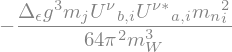

In [159]:
Add(*[x for x in BB2.expand().args if x.has(lfvhd.Δe)]).simplify()

In [160]:
div = (
    (AL8 + AL10).subs(lfvhd.cambiosDivFin(mn[i],mW,mW))
).expand().collect([lfvhd.Δe],evaluate=False)
lfvhd.Δe*div[lfvhd.Δe].factor()#.subs(m[ea],m[eb])